In [4]:
#importing all required libraries 
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
!pip3 install plotly

In [6]:
import plotly.express as px
import plotly.io as pio
pio.renderers


Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype+notebook'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [7]:
pip install -U kaleido

Note: you may need to restart the kernel to use updated packages.


In [10]:
df = pd.read_csv("Netflix_data.csv")

In [11]:
df.head() #To display first 5 rows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Day_Added,Month_Added,Year_Added,Day_of_Week
0,s1,TV Show,3%,Diego Pignataro,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,14/08/20,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,14,8,2020,Friday
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,23/12/16,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23,12,2016,Friday
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,20/12/18,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",20,12,2018,Thursday
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,16/11/17,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",16,11,2017,Thursday
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,01/01/20,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,1,2020,Wednesday


In [12]:
df.tail() #To display last 5 rows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Day_Added,Month_Added,Year_Added,Day_of_Week
7745,s2792,TV Show,Homemade,Esteban Vidal,"Christopher Abbott, Kumiko Kaur Chadha Berges,...",Chile,30/06/20,2020,TV-MA,1 Season,"International TV Shows, TV Dramas",Acclaimed filmmakers from around the world cha...,30,6,2020,Tuesday
7746,s3594,Movie,LEGO Ninjago: Masters of Spinjitzu: Day of the...,Kaspar Astrup Schröder,"Vincent Tong, Kelly Metzger, Michael Adamthwai...",Denmark,01/02/19,2016,TV-Y7-FV,44 min,"Action & Adventure, Children & Family Movies",Cole finds himself trapped in Yang's temple af...,1,2,2019,Friday
7747,s3858,TV Show,Magical Andes,Luis Ara,Alexis Viera,Uruguay,15/10/19,2019,TV-G,1 Season,"Docuseries, International TV Shows, Science & ...","From Argentina to Colombia, this stunning docu...",15,10,2019,Tuesday
7748,s6259,TV Show,The Cuba Libre Story,Thierry Donard,"Ken Eaken, Jaime Suchlicki, Jean-Pierre Clerc,...",France,08/12/16,2015,TV-14,1 Season,"Docuseries, International TV Shows",This documentary series recounts the tumultuou...,8,12,2016,Thursday
7749,s7153,TV Show,Top 10 Secrets and Mysteries,Edward Cotterill,"Robert Russel, Zahi Hawass, Robert J. Groden, ...",United Kingdom,15/03/19,2018,TV-14,1 Season,"British TV Shows, Docuseries, Science & Nature TV",This series investigates mysteries that persis...,15,3,2019,Friday


In [13]:
df.shape #to display number of columns and rows

(7750, 16)

In [14]:
#droping columns not relevant to our analysis
df = df.drop(['cast', 'director', 'duration', 'description'],axis = 1)


In [15]:
df.describe() #

,release_year,Day_Added,Month_Added,Year_Added
count,7750.000000,7750.000000,7750.000000,7750.000000
mean,2013.916645,12.367226,6.777677,2018.493548
std,8.771075,9.962446,3.594886,1.388576
min,1925.000000,1.000000,1.000000,2008.000000
25%,2013.000000,1.000000,4.000000,2018.000000
50%,2017.000000,12.000000,7.000000,2019.000000
75%,2018.000000,20.000000,10.000000,2020.000000
max,2021.000000,31.000000,12.000000,2021.000000


In [16]:
df.info() #to check the datatypes of our columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7750 entries, 0 to 7749
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7750 non-null   object
 1   type          7750 non-null   object
 2   title         7750 non-null   object
 3   country       7750 non-null   object
 4   date_added    7750 non-null   object
 5   release_year  7750 non-null   int64 
 6   rating        7750 non-null   object
 7   listed_in     7750 non-null   object
 8   Day_Added     7750 non-null   int64 
 9   Month_Added   7750 non-null   int64 
 10  Year_Added    7750 non-null   int64 
 11  Day_of_Week   7750 non-null   object
dtypes: int64(4), object(8)
memory usage: 726.7+ KB


In [17]:
df.isnull().values.any() #to check id there are empty values

False

In [18]:
df.isna().sum()

show_id         0
type            0
title           0
country         0
date_added      0
release_year    0
rating          0
listed_in       0
Day_Added       0
Month_Added     0
Year_Added      0
Day_of_Week     0
dtype: int64

In [19]:
#to change datatype of date_added
df['date_added'] = pd.to_datetime(df['date_added'])
df['release_year'] = pd.to_numeric(df['release_year'])

In [20]:
df.head()

,show_id,type,title,country,date_added,release_year,rating,listed_in,Day_Added,Month_Added,Year_Added,Day_of_Week
0,s1,TV Show,3%,Brazil,2020-08-14,2020,TV-MA,"International TV Shows, TV Dramas, TV Sci-Fi &...",14,8,2020,Friday
1,s2,Movie,7:19,Mexico,2016-12-23,2016,TV-MA,"Dramas, International Movies",23,12,2016,Friday
2,s3,Movie,23:59,Singapore,2018-12-20,2011,R,"Horror Movies, International Movies",20,12,2018,Thursday
3,s4,Movie,9,United States,2017-11-16,2009,PG-13,"Action & Adventure, Independent Movies, Sci-Fi...",16,11,2017,Thursday
4,s5,Movie,21,United States,2020-01-01,2008,PG-13,Dramas,1,1,2020,Wednesday


In [21]:
df.info() #recheck datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7750 entries, 0 to 7749
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7750 non-null   object        
 1   type          7750 non-null   object        
 2   title         7750 non-null   object        
 3   country       7750 non-null   object        
 4   date_added    7750 non-null   datetime64[ns]
 5   release_year  7750 non-null   int64         
 6   rating        7750 non-null   object        
 7   listed_in     7750 non-null   object        
 8   Day_Added     7750 non-null   int64         
 9   Month_Added   7750 non-null   int64         
 10  Year_Added    7750 non-null   int64         
 11  Day_of_Week   7750 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(7)
memory usage: 726.7+ KB


In [41]:
df.release_year.value_counts()[:10] #total count of content released by Netflix per year

2018    1116
2017    1010
2019     984
2016     876
2020     862
2015     540
2014     333
2013     266
2012     219
2010     172
Name: release_year, dtype: int64

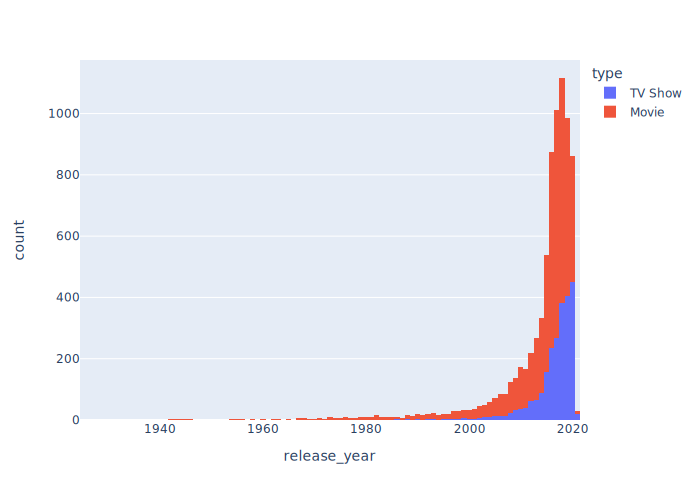

In [22]:
 #histogram shows that Netflix released content the most in 2018
fig = px.histogram(df, x= 'release_year', color= 'type')
fig.show(renderer="svg")

In [40]:
#extract month from data added
df['date_added_month'] = df['date_added'].dt.month
df

,show_id,type,title,country,date_added,release_year,rating,listed_in,Day_Added,Month_Added,Year_Added,Day_of_Week,date_added_month
0,s1,TV Show,3%,Brazil,2020-08-14,2020,TV-MA,"International TV Shows, TV Dramas, TV Sci-Fi &...",14,8,2020,Friday,8
1,s2,Movie,7:19,Mexico,2016-12-23,2016,TV-MA,"Dramas, International Movies",23,12,2016,Friday,12
2,s3,Movie,23:59,Singapore,2018-12-20,2011,R,"Horror Movies, International Movies",20,12,2018,Thursday,12
3,s4,Movie,9,United States,2017-11-16,2009,PG-13,"Action & Adventure, Independent Movies, Sci-Fi...",16,11,2017,Thursday,11
4,s5,Movie,21,United States,2020-01-01,2008,PG-13,Dramas,1,1,2020,Wednesday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7745,s2792,TV Show,Homemade,Chile,2020-06-30,2020,TV-MA,"International TV Shows, TV Dramas",30,6,2020,Tuesday,6
7746,s3594,Movie,LEGO Ninjago: Masters of Spinjitzu: Day of the...,Denmark,2019-01-02,2016,TV-Y7-FV,"Action & Adventure, Children & Family Movies",1,2,2019,Friday,1
7747,s3858,TV Show,Magical Andes,Uruguay,2019-10-15,2019,TV-G,"Docuseries, International TV Shows, Science & ...",15,10,2019,Tuesday,10
7748,s6259,TV Show,The Cuba Libre Story,France,2016-08-12,2015,TV-14,"Docuseries, International TV Shows",8,12,2016,Thursday,8


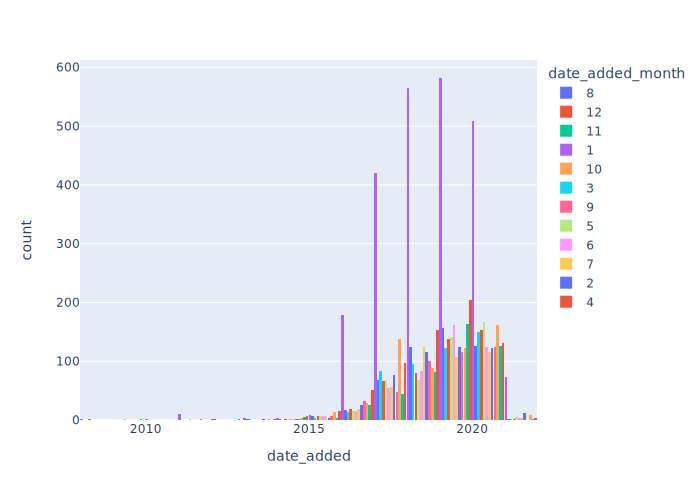

In [39]:
#histogram displays that Netflix adds content on the first month of the year which is January more than any other month
fig = px.histogram(df, x= 'date_added', color = 'date_added_month') 

fig.show(renderer="svg")

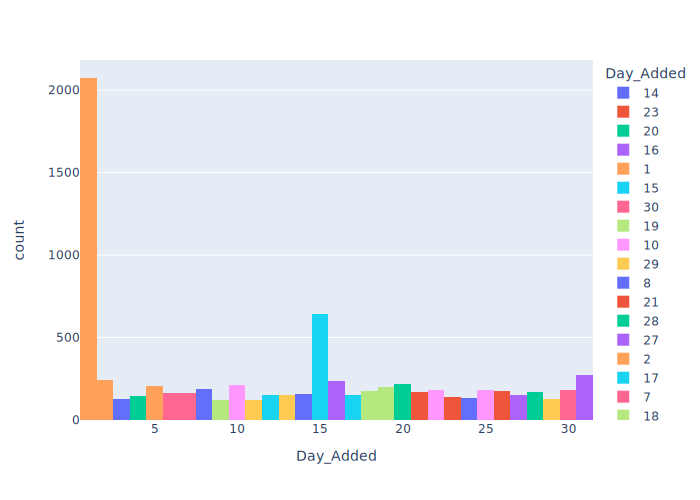

In [25]:
#histogram displays that Netflix adds movies on the first day of the month more than any other day
fig = px.histogram(df, x= 'Day_Added', color = 'Day_Added') 
fig.show(renderer="svg")


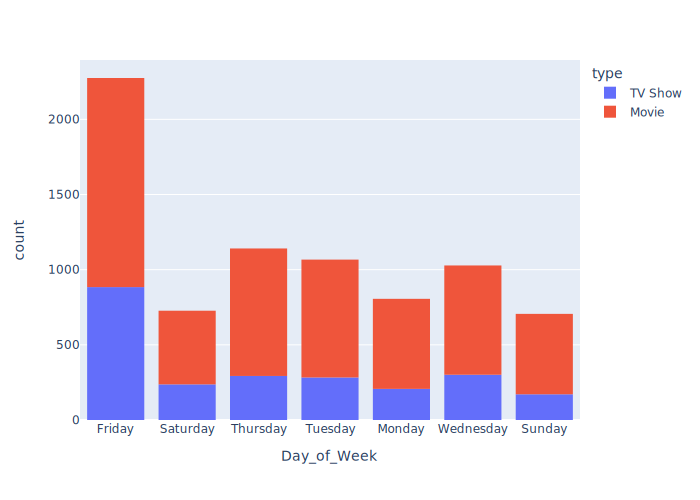

In [26]:
#histogram displays that Netflix adds content on FRIDAYs more than any other day
fig = px.histogram(df, x= 'Day_of_Week', color = 'type') 
fig.show(renderer="svg")

In [27]:
#count total values by type 
df.type.value_counts()


Movie      5374
TV Show    2376
Name: type, dtype: int64

In [29]:
g = df.groupby('type') #group by types 
g

In [30]:
for type, type_df in g:
    print (type)
    print (type_df)

Movie
     show_id   type                                              title  \
1         s2  Movie                                               7:19   
2         s3  Movie                                              23:59   
3         s4  Movie                                                  9   
4         s5  Movie                                                 21   
6         s7  Movie                                                122   
...      ...    ...                                                ...   
7732   s5117  Movie       Real Crime: Supermarket Heist (Tesco Bomber)   
7733   s5222  Movie                                     Rising Phoenix   
7734   s5410  Movie                             Saudi Arabia Uncovered   
7738   s6270  Movie                                   The Darkest Dawn   
7746   s3594  Movie  LEGO Ninjago: Masters of Spinjitzu: Day of the...   

             country date_added  release_year    rating  \
1             Mexico 2016-12-23          2016 

In [31]:
moviess = g.get_group('Movie')
moviess

,show_id,type,title,country,date_added,release_year,rating,listed_in,Day_Added,Month_Added,Year_Added,Day_of_Week
1,s2,Movie,7:19,Mexico,2016-12-23,2016,TV-MA,"Dramas, International Movies",23,12,2016,Friday
2,s3,Movie,23:59,Singapore,2018-12-20,2011,R,"Horror Movies, International Movies",20,12,2018,Thursday
3,s4,Movie,9,United States,2017-11-16,2009,PG-13,"Action & Adventure, Independent Movies, Sci-Fi...",16,11,2017,Thursday
4,s5,Movie,21,United States,2020-01-01,2008,PG-13,Dramas,1,1,2020,Wednesday
6,s7,Movie,122,Egypt,2020-01-06,2019,TV-MA,"Horror Movies, International Movies",1,6,2020,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...
7732,s5117,Movie,Real Crime: Supermarket Heist (Tesco Bomber),United Kingdom,2016-08-15,2010,TV-14,Documentaries,15,8,2016,Monday
7733,s5222,Movie,Rising Phoenix,United Kingdom,2020-08-26,2020,PG-13,"Documentaries, International Movies, Sports Mo...",26,8,2020,Wednesday
7734,s5410,Movie,Saudi Arabia Uncovered,United Kingdom,2016-01-09,2016,TV-14,Documentaries,1,9,2016,Thursday
7738,s6270,Movie,The Darkest Dawn,United Kingdom,2018-06-23,2016,TV-MA,"Action & Adventure, Independent Movies, Intern...",23,6,2018,Saturday


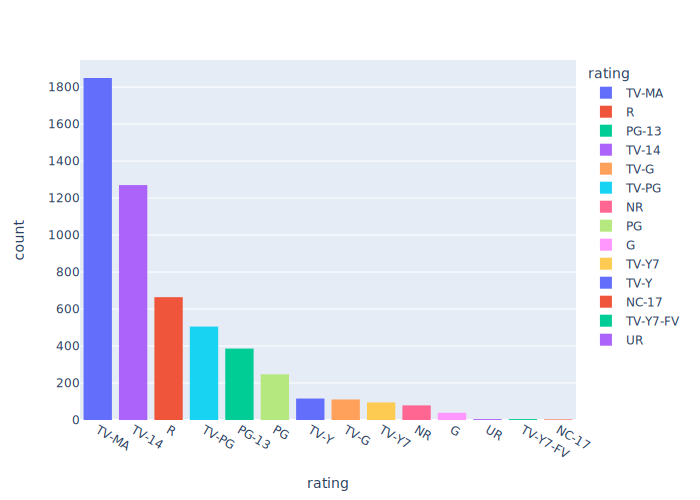

In [32]:
#sort by descending order, top ratings for movies
fig = px.histogram(moviess, x= 'rating', color = 'rating').update_xaxes(categoryorder = 'total descending')
fig.show(renderer="svg")

In [33]:
tv = g.get_group('TV Show')
tv

,show_id,type,title,country,date_added,release_year,rating,listed_in,Day_Added,Month_Added,Year_Added,Day_of_Week
0,s1,TV Show,3%,Brazil,2020-08-14,2020,TV-MA,"International TV Shows, TV Dramas, TV Sci-Fi &...",14,8,2020,Friday
5,s6,TV Show,46,Turkey,2017-01-07,2016,TV-MA,"International TV Shows, TV Dramas, TV Mysteries",1,7,2017,Saturday
11,s12,TV Show,1983,"Poland, United States",2018-11-30,2018,TV-MA,"Crime TV Shows, International TV Shows, TV Dramas",30,11,2018,Friday
21,s25,TV Show,​SAINT SEIYA: Knights of the Zodiac,Japan,2020-01-23,2020,TV-14,"Anime Series, International TV Shows",23,1,2020,Thursday
36,s46,TV Show,Şubat,Turkey,2017-01-17,2013,TV-MA,"Crime TV Shows, International TV Shows, TV Dramas",17,1,2017,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...
7744,s339,TV Show,Age of Tanks,Germany,2018-10-11,2017,TV-PG,"Docuseries, International TV Shows, Science & ...",10,11,2018,Saturday
7745,s2792,TV Show,Homemade,Chile,2020-06-30,2020,TV-MA,"International TV Shows, TV Dramas",30,6,2020,Tuesday
7747,s3858,TV Show,Magical Andes,Uruguay,2019-10-15,2019,TV-G,"Docuseries, International TV Shows, Science & ...",15,10,2019,Tuesday
7748,s6259,TV Show,The Cuba Libre Story,France,2016-08-12,2015,TV-14,"Docuseries, International TV Shows",8,12,2016,Thursday


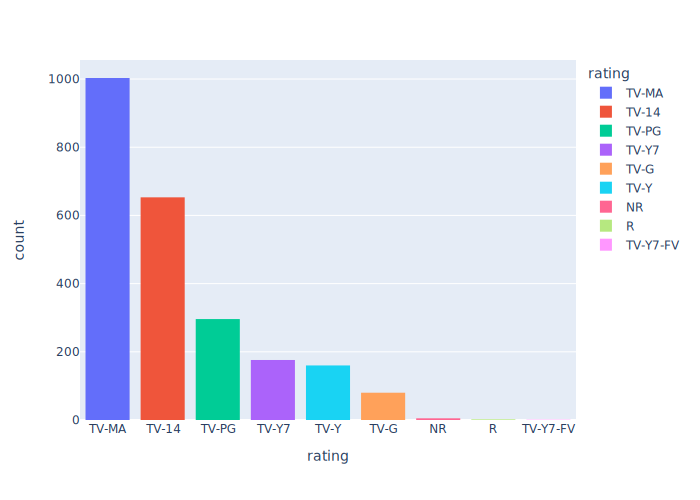

In [34]:
#sort by descending order, top ratings for TV Shows
fig = px.histogram(tv, x= 'rating', color = 'rating').update_xaxes(categoryorder = 'total descending')
fig.show(renderer="svg")

In [35]:
#Checking total count of content released by Netlix 
total = df.groupby('type').type.count()
total

type
Movie      5374
TV Show    2376
Name: type, dtype: int64

<AxesSubplot:ylabel='release_year'>

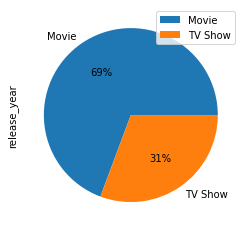

In [36]:
df.groupby(['type']).sum().plot(kind='pie', x = 'moviess', y = 'release_year', autopct='%1.0f%%') #demonstrated in pie chart

Text(0.5, 1.0, 'Count VS Type of Show')

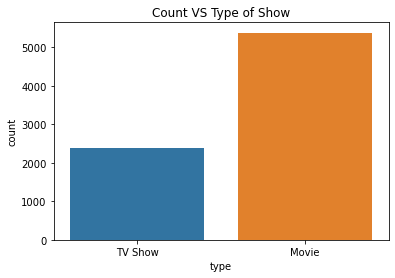

In [36]:
sns.countplot(x = 'type', data = df)
plt.title("Count VS Type of Show")

In [37]:
df['country'].value_counts().head(10) #top ten all time content producing countries on Netflix

United States     2990
India              942
United Kingdom     408
Japan              229
South Korea        188
Canada             187
Spain              136
France             123
Egypt              105
Mexico             102
Name: country, dtype: int64

Text(0.5, 1.0, 'Top 10 Countries on Netflix with the most content')

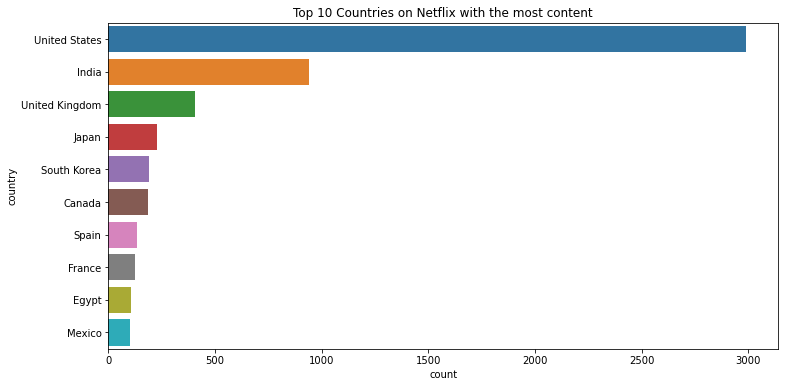

In [42]:
plt.figure(figsize = (12,6))
sns.countplot(y= 'country', order = df['country'].value_counts().index[0:10], data = df)
plt.title ('Top 10 Countries on Netflix with the most content')

Text(0.5, 1.0, 'Top Content Categories on Netflix')

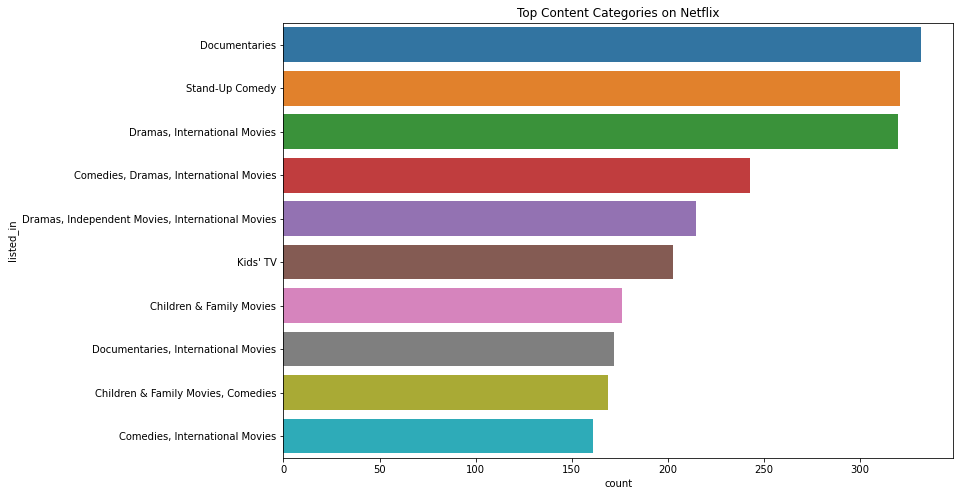

In [44]:
plt.figure(figsize = (12,8))
sns.countplot(y='listed_in', order = df['listed_in'].value_counts().index[0:10], data = df)
plt.title("Top Content Categories on Netflix")